# 作业二 &emsp; 数据探索分析
**主要任务：** 商品零. 对商品进行归类，用表格与饼图的形式显示各类别商品的销量及占比情况。
（商品类别为：非酒精饮料，肉类，西点，酒精饮料，果蔬，食品类，米粮
调料，零食，百货，熟食）售购物篮分析财政收入

**问题背景：** 购物篮分析是商业领域最前沿，最具有挑战性的问题之一。也是许多企业重点研究的问题。购物篮分析是通过发现顾客在一次购买行为中放入购物篮中不同商品的关联，研究顾客的购买行为，从而辅助零售企业制定营销策略的一种数据分析方法。企业为了获得最大的销售利润，清楚知晓销售什么样的商品，采用什么样的促销策略、商品在货架上如何摆放以及了解顾客的购买行为特征，并根据发现的规律而采取有效的行动，制定商品的摆放、商品定价、新商品采购计划，对增加销量并获取最大利润有重要意义。

某商品零售企业共收集了 4682 个购物篮数据，它主要包括 3 个属性，id，Goods和 Types，属性的具体说明如下表所示：

| 表名        | 属性名称 |     属性说明     |
|-------------|----------|:----------------:|
| Goods Order | id       | 商品购买者的编号 |
|             | Goods    |  具体的商品名称  |
| Goods Types | Goods    |  具体的商品名称  |
|             | Types    |     商品类别     |

**任务要求：** 查看数据特征，并对商品热销情况和商品结构进行分析。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 150 # 图片像素
plt.rcParams['figure.dpi'] = 150 # 分辨率
plt.rcParams.update({
    'font.family':'Times New Roman',
    # 'text.usetex': True
})

## 1. 读取数据，观察是否存在缺失值，并打印出每列属性的观测值，及 id 属性的最大值与最小值。

In [2]:
o = pd.read_csv('GoodsOrder.csv', encoding= 'GBK') # use tools to check the encoding
t = pd.read_csv('GoodsTypes.csv', encoding= 'GBK').set_index('Goods')
print('Determine if ANY Value in GoodsOrder.csv is Missing? ', o.isnull().values.any())
print('Determine if ANY Value in GoodsTypes.csv is Missing? ', t.isnull().values.any())

Determine if ANY Value in GoodsOrder.csv is Missing?  False
Determine if ANY Value in GoodsTypes.csv is Missing?  False


In [3]:
# print the values for every label/property
# print(o.head(10).T.style.to_latex())
# print(t.head(10).T.style.to_latex())

In [4]:
# read the statistical characters
osc = o.describe()
print('Get the max value: ', osc.loc['max'].to_numpy())
print('Get the min value: ', osc.loc['min'].to_numpy())

Get the max value:  [1082.]
Get the min value:  [1.]


## 2. 计算销量排行前 10 的商品销量及其占比，并用表格及柱状图的形式显示前10 的商品销量及其占比情况。

In [5]:
og = o.groupby('Goods').count()
ogs = og.sort_values('id', ascending=False)
ogs10 = ogs.iloc[:10, :]
# print(ogs10.T.style.to_latex())
# print(ogs.iloc[:10,0].sum())
# print(ogs.iloc[10:,0].sum())

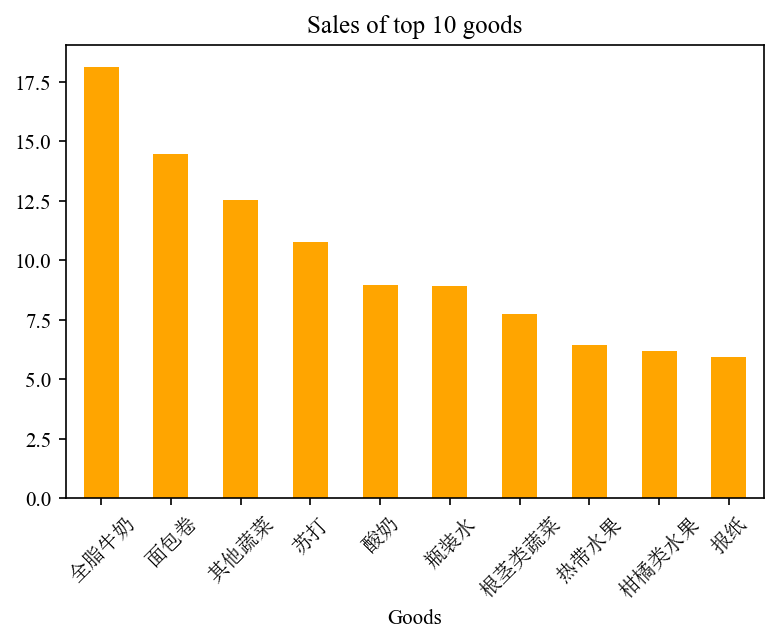

In [6]:
# bar for the top 10 goods
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='c:\\windows\\fonts\\simsun.ttc')  # speicify font
ogs10p = ogs10/ogs10.iloc[:,0].sum()*100
ax = ogs10p.plot.bar(rot=45, color = 'orange')
ax.set_xticklabels(ogs10.index, fontproperties=font)
ax.set_title('Sales of top 10 goods')
ax.get_legend().remove()
# plt.tight_layout()
plt.show()

## 3. 对商品进行归类，用表格与饼图的形式显示各类别商品的销量及占比情况。（商品类别为：非酒精饮料，肉类，西点，酒精饮料，果蔬，食品类，米粮调料，零食，百货，熟食）

In [7]:
ot = ogs.join(t, on="Goods")
ottp = ot.groupby('Types').sum()
otps = ottp.sort_values('id', ascending=False)
# print(otps.T.style.to_latex())

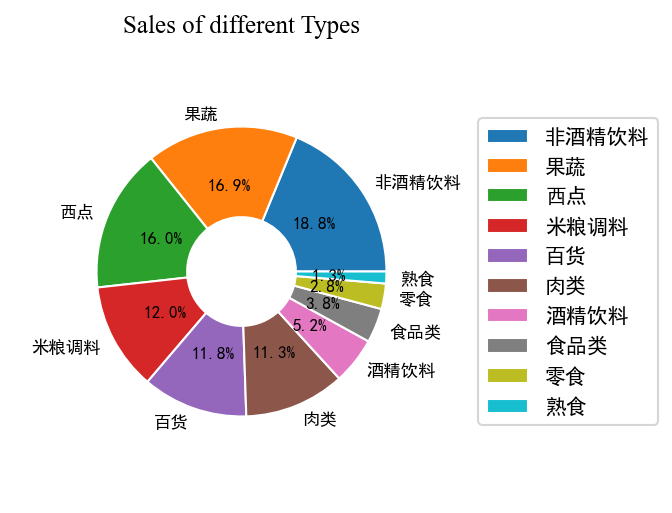

In [8]:
# pie chart for Types
plt.rcParams.update({'font.family':'SimHei'})
ax = otps.plot.pie(y='id',
                   autopct='%1.1f%%',
                   textprops={'size': 'smaller'},
                   radius=0.8,
                   wedgeprops=dict(width=0.5, edgecolor='w'),
                   )
ax.set_title('Sales of different Types', fontname='Times New Roman')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('')
plt.show()

In [9]:
# Use the plt original
# coming soon
otps['id'].to_numpy()
otps.index.to_numpy(dtype=str)

array(['非酒精饮料', '果蔬', '西点', '米粮调料', '百货', '肉类', '酒精饮料', '食品类', '零食', '熟食'],
      dtype='<U5')

## 4. 查看销量第三的商品类型的内部商品结构，用表格与饼图的形式显示其销量与占比情况。

In [10]:
ot3 = ot[ot['Types'].isin(['西点',])].drop(columns='Types')
# print(ot3.T.style.to_latex())

In [11]:
# So many bread types
logi = ot3.index.str.startswith('面包') | ot3.index.str.endswith('面包')
nbread = ot3[logi].iloc[:,0].sum()
ot3res = ot3.drop(index=ot3[logi].index)
# print(ot3[logi].T.style.to_latex())
bread = pd.DataFrame({'id': pd.Series(nbread, index=list(['面包']), dtype='int')})
bread.index.name = 'Goods'

In [12]:
# merge all the types of bread
ot3mod = pd.concat([bread, ot3res])
# print(ot3mod.T.style.to_latex())

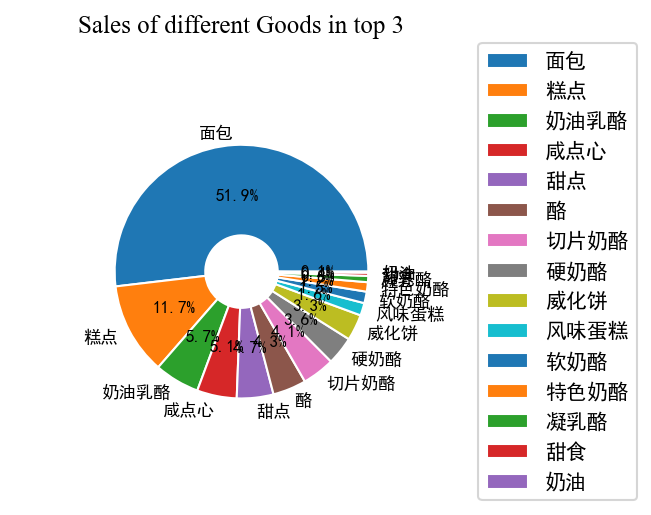

In [13]:
# pie chart for ot3mod
plt.rcParams.update({'font.family':'SimHei'})
ax = ot3mod.plot.pie(y='id',
                     autopct='%1.1f%%',
                     textprops={'size': 'smaller'},
                     radius=0.7,
                     wedgeprops=dict(width=0.5, edgecolor='w'),
                    )
ax.set_title('Sales of different Goods in top 3', fontname='Times New Roman')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('')
plt.show()